In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import os

main_dir = 'data'

In [48]:
folders = os.listdir(main_dir)

spread_data = []
complexity_data = []

for folder in folders:

    # Read dead-end states
    try:
        dead_ends = pd.read_csv(f'{main_dir}/{folder}/dead_ends.tsv', delimiter='\t')
    except: # EMPTY DATA
        continue
    
    non_const_metabolites = list(dead_ends.columns.copy())
    if 'H2O' in non_const_metabolites:
        non_const_metabolites.remove('H2O')
    elif 'H+' in non_const_metabolites:
        non_const_metabolites.remove('H+')
    
    M = len(non_const_metabolites)

    spread = 0
    for m in non_const_metabolites:
        spread += np.var(dead_ends[m])
    
    spread = np.sqrt((1.0/M) * spread)
    spread_data.append(spread)

    # Read stoich mat - evaluate complexity
    stoich_mat_full = np.loadtxt(f'{main_dir}/{folder}/stoich_mat_full.txt')

    NR, NC = stoich_mat_full.shape
    complexity = max(NR, NC) - np.linalg.matrix_rank(stoich_mat_full)
    complexity_data.append(complexity)

print(complexity_data)
print(spread_data)

[7, 9, 6, 6, 8, 7, 8, 9, 7, 7, 7, 6, 7, 8, 7, 6, 8, 8, 8, 8, 5, 7, 7, 7, 8, 7, 5, 8, 7, 6, 5, 9, 6, 7, 5, 7, 6, 8, 6, 6, 9, 6]
[0.7260600901516953, 1.0711336127723399, 0.7134660949639109, 1.3959909865295637, 1.8073631162632173, 0.9954898524827936, 0.09241353942923529, 5.457751640860094e-11, 5.961520879740088e-12, 0.4837603980204156, 1.595507467216808, 0.5303184658062063, 1.2792965033578512, 0.570385264301611, 0.33981118525434134, 1.529865195594364e-11, 0.13065547791970963, 0.009658109136779666, 1.2648630063681902e-09, 0.19005983106332625, 1.7694251544218431, 0.33307825857632695, 1.9774471931498857e-07, 2.2821583469130277e-12, 9.459335115118459e-08, 0.9297125760895525, 0.6497098156225016, 0.23461396843903104, 0.5869712039019627, 0.4507215118941831, 0.8500919367052102, 0.3828336750402057, 1.6069860433215397, 0.9117483919147495, 2.1033648744350355, 8.938325695926148e-12, 1.3363680352698943, 1.0096023215212436e-11, 2.177144776923108, 2.1855280509261912e-13, 8.403812965795788e-11, 1.0281810

In [49]:
# Estimate failure rate from report.txt files
main_folders = os.listdir(main_dir)

total = 0
fails = 0

for main_folder in main_folders:
    folders = os.listdir(f'{main_dir}/{main_folder}')
    files = [f'{main_dir}/{main_folder}/{folder}/report.txt' for folder in folders if os.path.isdir(f'{main_dir}/{main_folder}/{folder}')]
    for fname in files:
        if not os.path.exists(fname):
            continue

        total += 1
        with open(fname) as f:
            content = f.read()
            if content == "success: False":
                fails += 1

failure_rate = fails/total * 100

print(f'Failure rate: {failure_rate:.2f}%')

ZeroDivisionError: division by zero

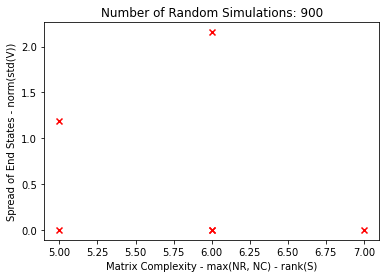

In [42]:
plt.scatter(complexity_data, spread_data, c='Red', marker='x')
plt.xlabel('Matrix Complexity - max(NR, NC) - rank(S)')
plt.ylabel('Spread of End States - norm(std(V))')
plt.title(f'Number of Random Simulations: {total}')
plt.show()